## Proceso de division en 3 df por sectores

In [199]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [217]:
# Función 
def completar_fechas(df, fechas_faltantes):
    for fecha in fechas_faltantes:
        valor_semana_anterior = 0
        c = 1
        
        # Obtener el valor de la semana anterior
        while valor_semana_anterior == 0:
            fecha_semana_anterior = fecha - pd.DateOffset(weeks=c)
            # Filtrar los valores correspondientes a esa fecha
            valor_semana_anterior_series = df.loc[df['Data'] == fecha_semana_anterior, 'Valor']
            
            # Verificar si hay valores para esa fecha
            if not valor_semana_anterior_series.empty:
                valor_semana_anterior = valor_semana_anterior_series.iloc[0]
            else:
                break  # Salir si no hay más fechas anteriores
            
            c += 1
        
        # Si existe el valor, añadirlo como nueva fila
        if valor_semana_anterior != 0:
            nuevo_registro = pd.DataFrame({'Data': [fecha], 'Valor': [valor_semana_anterior]})
            df = pd.concat([df, nuevo_registro], ignore_index=True)

    df = df.sort_values(by='Data').reset_index(drop=True)
    return df

In [201]:
#Cargar de los csv de cada estacion como df
df_industrial=pd.read_csv('../data/Final_Data/df_industrial.csv')
df_residencial=pd.read_csv('../data/Final_Data/df_residencial.csv')
df_servicios=pd.read_csv('../data/Final_Data/df_servicios.csv')
df_calendario=pd.read_csv('../data/Final_Data/df_calendar.csv')
df_clima=pd.read_csv('../data/Final_Data/df_clima_total.csv')
df_pib=pd.read_csv('../data/Final_Data/df_pib.csv')
df_pobl=pd.read_csv('../data/Final_Data/df_pob.csv')

In [202]:
#Transformamos todos los datos de tiempo a data time
df_industrial['Data'] = pd.to_datetime(df_industrial['Data'])
df_servicios['Data'] = pd.to_datetime(df_servicios['Data'])
df_residencial['Data'] = pd.to_datetime(df_residencial['Data'])
df_pobl['fecha'] = pd.to_datetime(df_pobl['fecha'])
df_clima['fecha'] = pd.to_datetime(df_clima['fecha'])
df_calendario['fecha'] = pd.to_datetime(df_calendario['fecha'])
df_pib['fecha'] = pd.to_datetime(df_pib['fecha'])
df_pib=df_pib.sort_values(by='fecha')
df_pib

,fecha,concepto,valor
0,2019-01-01,PIB,62490
180,2019-01-01,construcción,3041
270,2019-01-01,servicios,42493
90,2019-01-01,industria,11238
91,2019-01-02,industria,11238
...,...,...,...
18556,2024-06-29,industria,13062
18378,2024-06-30,PIB,77268
18736,2024-06-30,construcción,3343
18557,2024-06-30,industria,13062


In [203]:
#Dividiremos el df_pib en 3 diferentes
#El primero seria unicamente servicios
df_pib_servicios = df_pib[df_pib['concepto'] == 'servicios']
df_pib_servicios = df_pib_servicios.groupby('fecha', as_index=False).first()
df_pib_servicios=df_pib_servicios.drop('concepto',axis=1)
df_pib_servicios

,fecha,valor
0,2019-01-01,42493
1,2019-01-02,42493
2,2019-01-03,42493
3,2019-01-04,42493
4,2019-01-05,42493
...,...,...
2003,2024-06-26,54176
2004,2024-06-27,54176
2005,2024-06-28,54176
2006,2024-06-29,54176


In [204]:
#El segundo industria
df_pib_industria = df_pib[df_pib['concepto'].isin(['industria', 'construcción'])] .groupby('fecha', as_index=False)['valor'].sum()
df_pib_industria

,fecha,valor
0,2019-01-01,14279
1,2019-01-02,14279
2,2019-01-03,14279
3,2019-01-04,28632
4,2019-01-05,28632
...,...,...
2003,2024-06-26,16405
2004,2024-06-27,16405
2005,2024-06-28,16405
2006,2024-06-29,16405


In [205]:
#Por ultimo el df del pib total
df_pib_total = df_pib[df_pib['concepto'] == 'PIB']
df_pib_total = df_pib_total.groupby('fecha', as_index=False).first()
df_pib_total=df_pib_total.drop('concepto',axis=1)
df_pib_total

,fecha,valor
0,2019-01-01,62490
1,2019-01-02,62490
2,2019-01-03,62490
3,2019-01-04,63436
4,2019-01-05,62490
...,...,...
2003,2024-06-26,77268
2004,2024-06-27,77268
2005,2024-06-28,77268
2006,2024-06-29,77268


In [206]:
#Limpiamos el df de la población
df_pobl = df_pobl.groupby('fecha', as_index=False).first()
df_pobl

,fecha,valor
0,2019-01-01,5628011
1,2019-01-02,5628011
2,2019-01-03,5628011
3,2019-01-04,5628011
4,2019-01-05,5628011
...,...,...
2003,2024-06-26,5884873
2004,2024-06-27,5884873
2005,2024-06-28,5884873
2006,2024-06-29,5884873


In [207]:
#Comprobar la fecha anteriro
print(df_industrial['Data'].iloc[-1])
print(df_servicios['Data'].iloc[-1])
print(df_residencial['Data'].iloc[-1])
print(df_clima['fecha'].iloc[-1])
print(df_calendario['fecha'].iloc[-1])
print(df_pobl['fecha'].iloc[-1])
print(df_pib_industria['fecha'].iloc[-1])
print(df_pib_servicios['fecha'].iloc[-1])
print(df_pib_total['fecha'].iloc[-1])

2024-08-31 00:00:00
2024-08-31 00:00:00
2024-08-31 00:00:00
2024-09-27 00:00:00
2024-09-30 00:00:00
2024-06-30 00:00:00
2024-06-30 00:00:00
2024-06-30 00:00:00
2024-06-30 00:00:00


In [209]:
#Como el valor mas reducido es el del pib, reduciremos todos los df a esa fecha
fecha_limite = pd.to_datetime('2024-06-30')

# Filtrar cada DataFrame
df_industrial = df_industrial[df_industrial['Data'] <= fecha_limite]
df_residencial = df_industrial[df_residencial['Data'] <= fecha_limite]
df_servicios = df_servicios[df_servicios['Data'] <= fecha_limite]
df_calendario = df_calendario[df_calendario['fecha'] <= fecha_limite]
df_clima = df_clima[df_clima['fecha'] <= fecha_limite]
df_pobl = df_pobl[df_pobl['fecha'] <= fecha_limite]
df_pib_industria = df_pib_industria[df_pib_industria['fecha'] <= fecha_limite]
df_pib_servicios = df_pib_servicios[df_pib_servicios['fecha'] <= fecha_limite]
df_pib_total = df_pib_total[df_pib_total['fecha'] <= fecha_limite]

print(df_industrial['Data'].iloc[-1])
print(df_servicios['Data'].iloc[-1])
print(df_residencial['Data'].iloc[-1])
print(df_clima['fecha'].iloc[-1])
print(df_calendario['fecha'].iloc[-1])
print(df_pobl['fecha'].iloc[-1])
print(df_pib_industria['fecha'].iloc[-1])
print(df_pib_servicios['fecha'].iloc[-1])
print(df_pib_total['fecha'].iloc[-1])

2024-06-30 00:00:00
2024-06-30 00:00:00
2024-06-30 00:00:00
2024-06-30 00:00:00
2024-06-30 00:00:00
2024-06-30 00:00:00
2024-06-30 00:00:00
2024-06-30 00:00:00
2024-06-30 00:00:00


In [210]:
print(len(df_industrial['Data']))
print(len(df_residencial['Data']))
print(len(df_servicios['Data']))
print(len(df_calendario['fecha']))
print(len(df_clima['fecha']))
print(len(df_pobl['fecha']))
print(len(df_pib_industria['fecha']))
print(len(df_pib_servicios['fecha']))
print(len(df_pib_total['fecha']))

1969
1969
1970
2008
2008
2008
2008
2008
2008


In [221]:
#Comprobacion de fechas faltantes
fechasInd=set(df_industrial['Data'])
fechasSer=set(df_servicios['Data'])
fechasRes=set(df_residencial['Data'])
fechasTot=set(df_pobl['fecha'])

faltanInd=fechasTot-fechasInd
faltanSer=fechasTot-fechasSer
faltanRes=fechasTot-fechasRes

print(f'Industrial {faltanInd}')
print(f'Servicios {faltanSer}')
print(f'Residencial {faltanRes}')

Industrial {Timestamp('2024-02-27 00:00:00'), Timestamp('2024-02-29 00:00:00'), Timestamp('2024-02-28 00:00:00'), Timestamp('2024-02-23 00:00:00'), Timestamp('2024-02-24 00:00:00')}
Servicios {Timestamp('2024-02-27 00:00:00'), Timestamp('2024-02-29 00:00:00'), Timestamp('2024-02-28 00:00:00'), Timestamp('2024-02-23 00:00:00'), Timestamp('2024-02-24 00:00:00')}
Residencial {Timestamp('2024-02-27 00:00:00'), Timestamp('2024-02-29 00:00:00'), Timestamp('2024-02-28 00:00:00'), Timestamp('2024-02-23 00:00:00'), Timestamp('2024-02-24 00:00:00')}


In [222]:
#Igualar los df
df_industrial=completar_fechas(df_industrial,faltanInd)
df_servicios=completar_fechas(df_servicios,faltanSer)
df_residencial=completar_fechas(df_residencial,faltanRes)
print(len(df_industrial['Data']))
print(len(df_residencial['Data']))
print(len(df_servicios['Data']))

2008
2008
2008


In [223]:
#agrupar los df en funcion del sector economico
#industrial
df_industrial_total = pd.merge(df_industrial, df_calendario, left_on='Data', right_on='fecha', how='inner')
df_industrial_total=df_industrial_total.drop('Data',axis=1)
df_industrial_total = pd.merge(df_industrial_total, df_clima, on='fecha', how='inner')
df_industrial_total = pd.merge(df_industrial_total, df_pobl, on='fecha', how='inner')
df_industrial_total = pd.merge(df_industrial_total, df_pib_industria, on='fecha', how='inner')
df_industrial_total=df_industrial_total.rename(columns={'valor_x':'poblacion', 'valor_y':'PIB'})
df_industrial_total

,Sector_Economic,Valor,año,fecha,findesemana,festivos,lectivos,COVID,tmed,prec,velmedia,poblacion,PIB
0,Indústria,995989,2019.0,2019-01-01,0,1,0,0,8.590909,0.0,1.417647,5628011,14279
1,Indústria,1702091,2019.0,2019-01-02,0,0,0,0,6.617391,0.3,2.152941,5628011,14279
2,Indústria,1826076,2019.0,2019-01-03,0,0,0,0,5.604348,0.1,1.676471,5628011,14279
3,Indústria,1806926,2019.0,2019-01-04,0,0,0,0,5.004348,0.0,1.335294,5628011,28632
4,Indústria,1341548,2019.0,2019-01-05,1,0,0,0,6.173913,0.0,2.247059,5628011,28632
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,Indústria,1403736,2024.0,2024-06-26,0,0,0,0,22.623810,0.0,2.168750,5884873,16405
2004,Indústria,1365435,2024.0,2024-06-27,0,0,0,0,23.776190,0.0,1.912500,5884873,16405
2005,Indústria,1358576,2024.0,2024-06-28,0,0,0,0,24.452381,15.5,2.637500,5884873,16405
2006,Indústria,994740,2024.0,2024-06-29,1,0,0,0,20.942857,223.6,2.050000,5884873,16405


In [224]:
#servicios
df_servicios_total = pd.merge(df_servicios, df_calendario, left_on='Data', right_on='fecha', how='inner')
df_servicios_total=df_servicios_total.drop('Data',axis=1)
df_servicios_total = pd.merge(df_servicios_total, df_clima, on='fecha', how='inner')
df_servicios_total = pd.merge(df_servicios_total, df_pobl, on='fecha', how='inner')
df_servicios_total = pd.merge(df_servicios_total, df_pib_servicios, on='fecha', how='inner')
df_servicios_total=df_servicios_total.rename(columns={'valor_x':'poblacion', 'valor_y':'PIB'})
df_servicios_total

,Sector_Economic,Valor,año,fecha,findesemana,festivos,lectivos,COVID,tmed,prec,velmedia,poblacion,PIB
0,Serveis,7338057,2019.0,2019-01-01,0,1,0,0,8.590909,0.0,1.417647,5628011,42493
1,Serveis,10409953,2019.0,2019-01-02,0,0,0,0,6.617391,0.3,2.152941,5628011,42493
2,Serveis,10625634,2019.0,2019-01-03,0,0,0,0,5.604348,0.1,1.676471,5628011,42493
3,Serveis,10570866,2019.0,2019-01-04,0,0,0,0,5.004348,0.0,1.335294,5628011,42493
4,Serveis,8572617,2019.0,2019-01-05,1,0,0,0,6.173913,0.0,2.247059,5628011,42493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,Serveis,11199017,2024.0,2024-06-26,0,0,0,0,22.623810,0.0,2.168750,5884873,54176
2004,Serveis,11032570,2024.0,2024-06-27,0,0,0,0,23.776190,0.0,1.912500,5884873,54176
2005,Serveis,11226249,2024.0,2024-06-28,0,0,0,0,24.452381,15.5,2.637500,5884873,54176
2006,Serveis,9529016,2024.0,2024-06-29,1,0,0,0,20.942857,223.6,2.050000,5884873,54176


In [225]:
#residencial
df_residencial_total = pd.merge(df_residencial, df_calendario, left_on='Data', right_on='fecha', how='inner')
df_residencial_total=df_residencial_total.drop('Data',axis=1)
df_residencial_total = pd.merge(df_residencial_total, df_clima, on='fecha', how='inner')
df_residencial_total = pd.merge(df_residencial_total, df_pobl, on='fecha', how='inner')
df_residencial_total = pd.merge(df_residencial_total, df_pib_total, on='fecha', how='inner')
df_residencial_total=df_residencial_total.rename(columns={'valor_x':'poblacion', 'valor_y':'PIB'})
df_residencial_total

,Sector_Economic,Valor,año,fecha,findesemana,festivos,lectivos,COVID,tmed,prec,velmedia,poblacion,PIB
0,Indústria,995989,2019.0,2019-01-01,0,1,0,0,8.590909,0.0,1.417647,5628011,62490
1,Indústria,1702091,2019.0,2019-01-02,0,0,0,0,6.617391,0.3,2.152941,5628011,62490
2,Indústria,1826076,2019.0,2019-01-03,0,0,0,0,5.604348,0.1,1.676471,5628011,62490
3,Indústria,1806926,2019.0,2019-01-04,0,0,0,0,5.004348,0.0,1.335294,5628011,63436
4,Indústria,1341548,2019.0,2019-01-05,1,0,0,0,6.173913,0.0,2.247059,5628011,62490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,Indústria,1403736,2024.0,2024-06-26,0,0,0,0,22.623810,0.0,2.168750,5884873,77268
2004,Indústria,1365435,2024.0,2024-06-27,0,0,0,0,23.776190,0.0,1.912500,5884873,77268
2005,Indústria,1358576,2024.0,2024-06-28,0,0,0,0,24.452381,15.5,2.637500,5884873,77268
2006,Indústria,994740,2024.0,2024-06-29,1,0,0,0,20.942857,223.6,2.050000,5884873,77268


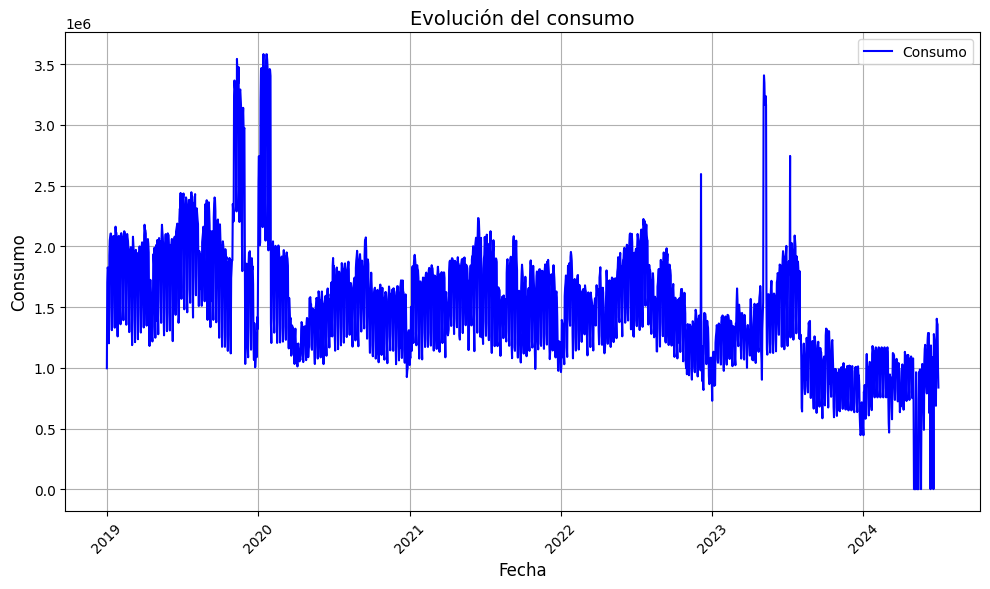

In [226]:
# Crear la gráfica temporal
plt.figure(figsize=(10,6))
plt.plot(df_industrial_total['fecha'], df_industrial_total['Valor'], label='Consumo', color='b')

# Personalizar el gráfico
plt.title('Evolución del consumo', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Consumo', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas de fechas si son muchas
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

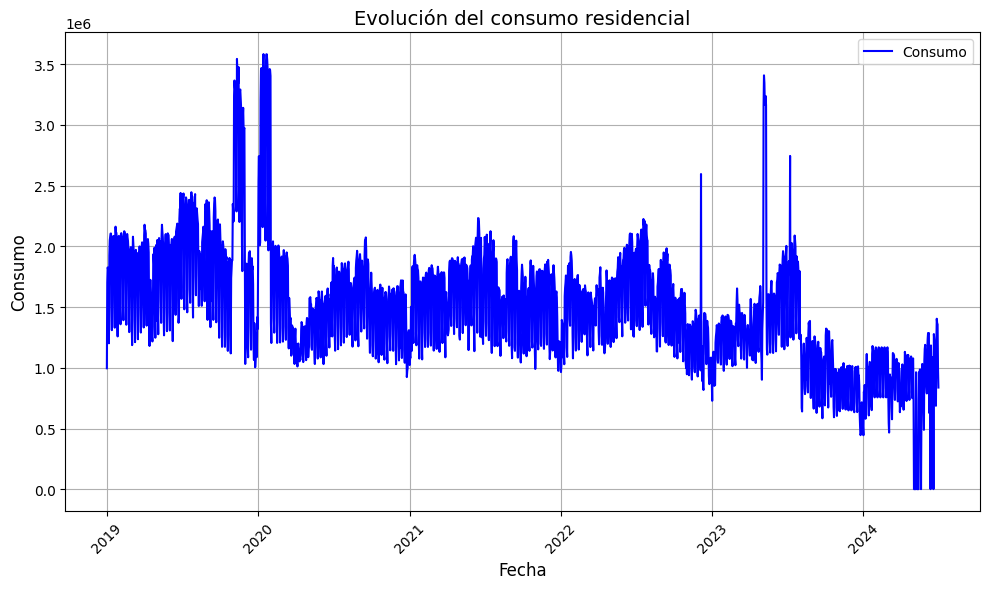

In [227]:
# Crear la gráfica temporal
plt.figure(figsize=(10,6))
plt.plot(df_residencial_total['fecha'], df_residencial_total['Valor'], label='Consumo', color='b')

# Personalizar el gráfico
plt.title('Evolución del consumo residencial', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Consumo', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas de fechas si son muchas
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

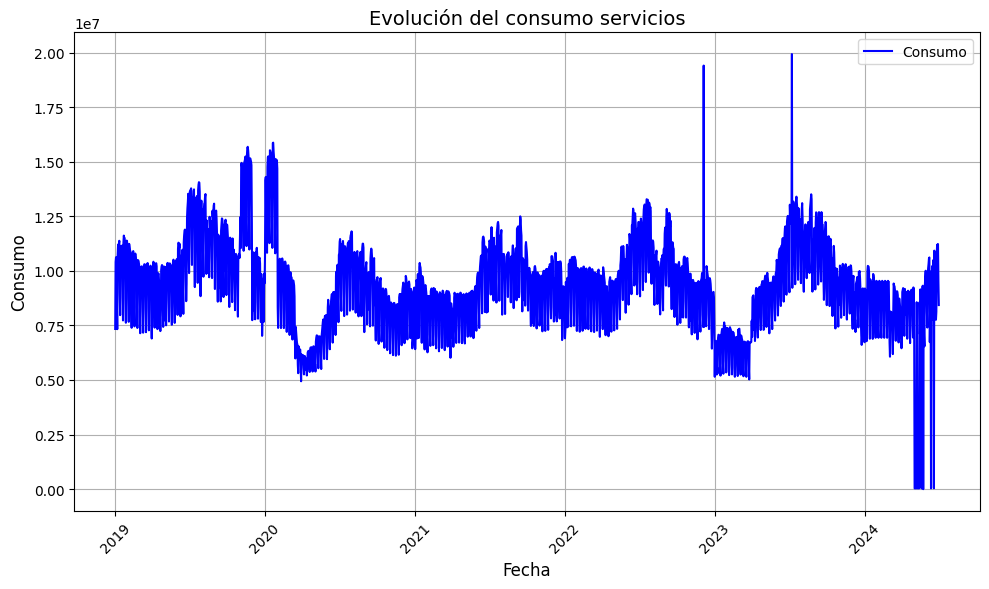

In [228]:
# Crear la gráfica temporal
plt.figure(figsize=(10,6))
plt.plot(df_servicios_total['fecha'], df_servicios_total['Valor'], label='Consumo', color='b')

# Personalizar el gráfico
plt.title('Evolución del consumo servicios', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Consumo', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas de fechas si son muchas
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [193]:
#Guardamos los datos en un CSV
df_industrial_total.to_csv("../data/DF_modelos/df_industrial_total.csv", index = False)
df_servicios_total.to_csv("../data/DF_modelos/df_servicios_total.csv", index = False)
df_residencial_total.to_csv("../data/DF_modelos/df_residencial_total.csv", index = False)